In [33]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv(r"C:\Users\gg787\ADP_데싸라면\adp_데이터모음\data\credit_final.csv")
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [41]:
feature = df.drop("credit.rating", axis = 1)
label = df["credit.rating"]


X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.3, random_state = 2021)

In [64]:
mlp = MLPClassifier(random_state = 2020)
mlp.fit(X_train, y_train)
print("학습 데이터 성능 : {}".format(mlp.score(X_train, y_train)))
print("테스트 데이터 성능 : {}".format(mlp.score(X_test, y_test)))

학습 데이터 성능 : 0.7157142857142857
테스트 데이터 성능 : 0.6766666666666666


In [67]:
from sklearn.preprocessing import StandardScaler
# Scaler 이후 다시 학습

scaler = StandardScaler()
scaler_df = scaler.fit_transform(feature)

X_scaled_tr, X_scaled_te, y_scaled_tr, y_scaled_te = train_test_split(scaler_df, label, test_size = 0.3)

In [70]:
mlp = MLPClassifier(random_state = 2021)
mlp.fit(X_scaled_tr, y_scaled_tr)
print("스케일된 학습데이터 성능 : {}".format(mlp.score(X_scaled_tr, y_scaled_tr)))
print("스케일된 테스트 데이터 성능 : {}".format(mlp.score(X_scaled_te, y_scaled_te)))

스케일된 학습데이터 성능 : 0.9228571428571428
스케일된 테스트 데이터 성능 : 0.7266666666666667


C:\Users\gg787\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\gg787\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


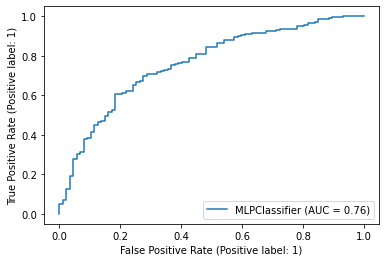

In [71]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(mlp, X_scaled_te, y_scaled_te)

In [ ]:
#그리드 서치로 하이퍼 파라미터 조정

param_grid = {"hidden_layer_sizes":[10,30,50,100],
              "solver":["sgd","adam"],
              "activation":["tanh","relu"]}

In [73]:
from sklearn.metrics import confusion_matrix
pred = mlp.predict(X_scaled_te)
confusion_matrix(y_scaled_te, pred)

array([[ 46,  41],
       [ 41, 172]], dtype=int64)